# Data Card

CLIENTNUM – Unique identifier for each customer.

Attrition_Flag – Customer churn status (Existing Customer or Attrited Customer).

Customer_Age – Age of the customer in years.

Gender – Gender of the customer (M or F).

Dependent_count – Number of dependents the customer has.

Education_Level – Customer’s highest education level.

Marital_Status – Marital status of the customer.

Income_Category – Customer’s annual income bracket.

Card_Category – Type of credit card held (Blue, Silver, Gold, Platinum).

Months_on_book – Tenure of the customer with the bank (in months).

Total_Relationship_Count – Number of products the customer has with the bank.

Months_Inactive_12_mon – Number of inactive months in the last 12 months.

Contacts_Count_12_mon – Number of contacts made in the last 12 months.

Credit_Limit – Credit card limit assigned to the customer.

Total_Revolving_Bal – Total revolving balance on the card.

Avg_Open_To_Buy – Average available credit to spend (Credit_Limit - Revolving Balance).

Total_Amt_Chng_Q4_Q1 – Ratio of transaction amount in Q4 over Q1.

Total_Trans_Amt – Total transaction amount in the last 12 months.

Total_Trans_Ct – Total number of transactions in the last 12 months.

Total_Ct_Chng_Q4_Q1 – Ratio of transaction count in Q4 over Q1.

Avg_Utilization_Ratio – Average utilization ratio of the credit card (balance ÷ limit).

# data ingestion & first audit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('../data/BankChurners.csv')
df_backup = df.copy()


In [6]:
df.shape

(10127, 23)

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [3]:
# drop the last two columns which are not needed for analysis
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
         axis=1, inplace=True)

In [6]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
df['Dependent_count'].value_counts()

Dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64


#### Numerical Features
- **Customer_Age**: 75%, ranging from 26 to 52.
- **Dependent_count**: Most customers have 2-3 dependents (min: 0, max: 5).
- **Credit_Limit**: Mean credit limit is ~$8,700 which is almost twice the median (skewness), with a wide range ($1,438–$34,900).
- **Total_Revolving_Bal**: Majority have balances below $2,500, but some reach up to $2,517.
- **Avg_Open_To_Buy**: Average available credit is ~$7,500; some have no available credit.
- **Total_Trans_Amt & Total_Trans_Ct**: High variability in transaction amounts and counts, indicating diverse spending patterns.
- **Avg_Utilization_Ratio**: Low average utilization (~0.27), suggesting most customers use a small portion of their credit.

#### Categorical Features
- **Attrition_Flag**: Most customers are existing; attrited customers form a minority.
- **Gender**: Fairly balanced distribution between male and female.
- **Education_Level**: Diverse education backgrounds; 'Graduate' and 'High School' are common.
- **Marital_Status**: Majority are married, followed by single and unknown status.
- **Income_Category**: Most customers fall into '$40K - $60K' and 'Less than $40K' brackets.
- **Card_Category**: 'Blue' card is predominant; other categories (Silver, Gold, Platinum) are less common.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Business Questions & Analysis Plan
### Overall Churn Profile

1. What is the overall churn rate?
2. How many customers are attrited vs existing?

### Does age affect churn likelihood (young vs old)?

1. Is there a difference in churn between genders?
2. How does dependent_count (family responsibility) relate to churn?

### Socioeconomic Factors & Churn

1. Does churn vary by education level?
2. Does income category affect churn (low vs high income)?
3. Does marital status play a role in churn?

### How does churn differ across card categories (Blue, Silver, Gold, Platinum)?

1. Does total relationship count (number of products held) reduce churn?
2. Does longer tenure (months_on_book) make customers more loyal?

### Engagement & Activity Patterns

1. Do inactive months increase churn probability?
2. Does contacts count in 12 months reduce churn, or is it a frustration signal?
3. Are churned customers transacting less frequently (Total_Trans_Ct)?

### Financial Behavior & Churn

1. Does credit limit level affect churn?
2. Does revolving balance (debt carried) relate to churn?
3. Do customers with high utilization ratio churn more?

### Spending Trends & Churn

1. Do churned customers spend less in total (Total_Trans_Amt)?
2. How does change in transaction amount (Q4/Q1) differ between churned and retained?
3. How does change in transaction count (Q4/Q1) differ between churned and retained?

### Early Warning Indicators

1. Which variables are most strongly associated with churn?
2. Can we outline a profile of a high-risk customer (demographic + behavior + financial)?

### Actionable Recommendations

1. Which customer groups should we target with retention strategies?


------------------------------------------------


# Big picture insights

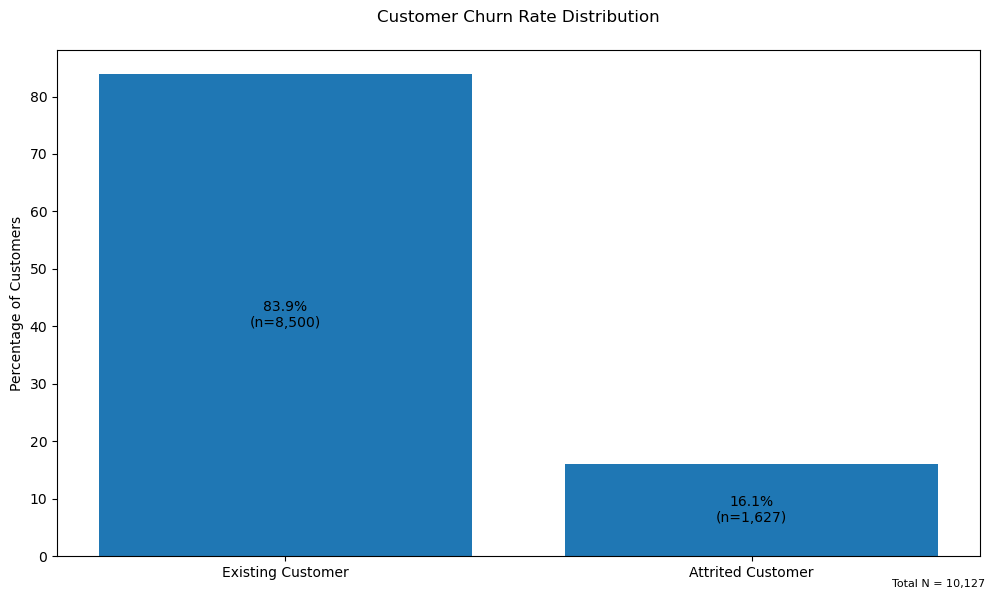


Churn Rate Summary:
--------------------------------------------------
Total Customers: 10,127
Churned Customers: 1,627
Overall Churn Rate: 16.1%


In [9]:
# Calculate overall churn rate
churn_rate = df['Attrition_Flag'].value_counts(normalize=True)
churn_counts = df['Attrition_Flag'].value_counts()

# Create figure with both percentage and count
fig, ax = plt.subplots(figsize=(10, 6))

# Plot percentage bars
bars = ax.bar(churn_rate.index, churn_rate * 100)

# Annotate percentages and counts
for i, (pct, cnt) in enumerate(zip(churn_rate, churn_counts)):
    ax.text(i, pct*100/2, 
            f'{pct*100:.1f}%\n(n={cnt:,})',
            ha='center', va='center')

# Customize plot
ax.set_title('Customer Churn Rate Distribution', pad=20)
ax.set_ylabel('Percentage of Customers')
plt.xticks(rotation=0)

# Add sample size in bottom right
plt.figtext(0.99, 0.01, f'Total N = {len(df):,}', 
            ha='right', va='bottom', fontsize=8)

# Display plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nChurn Rate Summary:")
print("-" * 50)
print(f"Total Customers: {len(df):,}")
print(f"Churned Customers: {churn_counts['Attrited Customer']:,}")
print(f"Overall Churn Rate: {churn_rate['Attrited Customer']*100:.1f}%")# Demographic Risk Analysis



In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

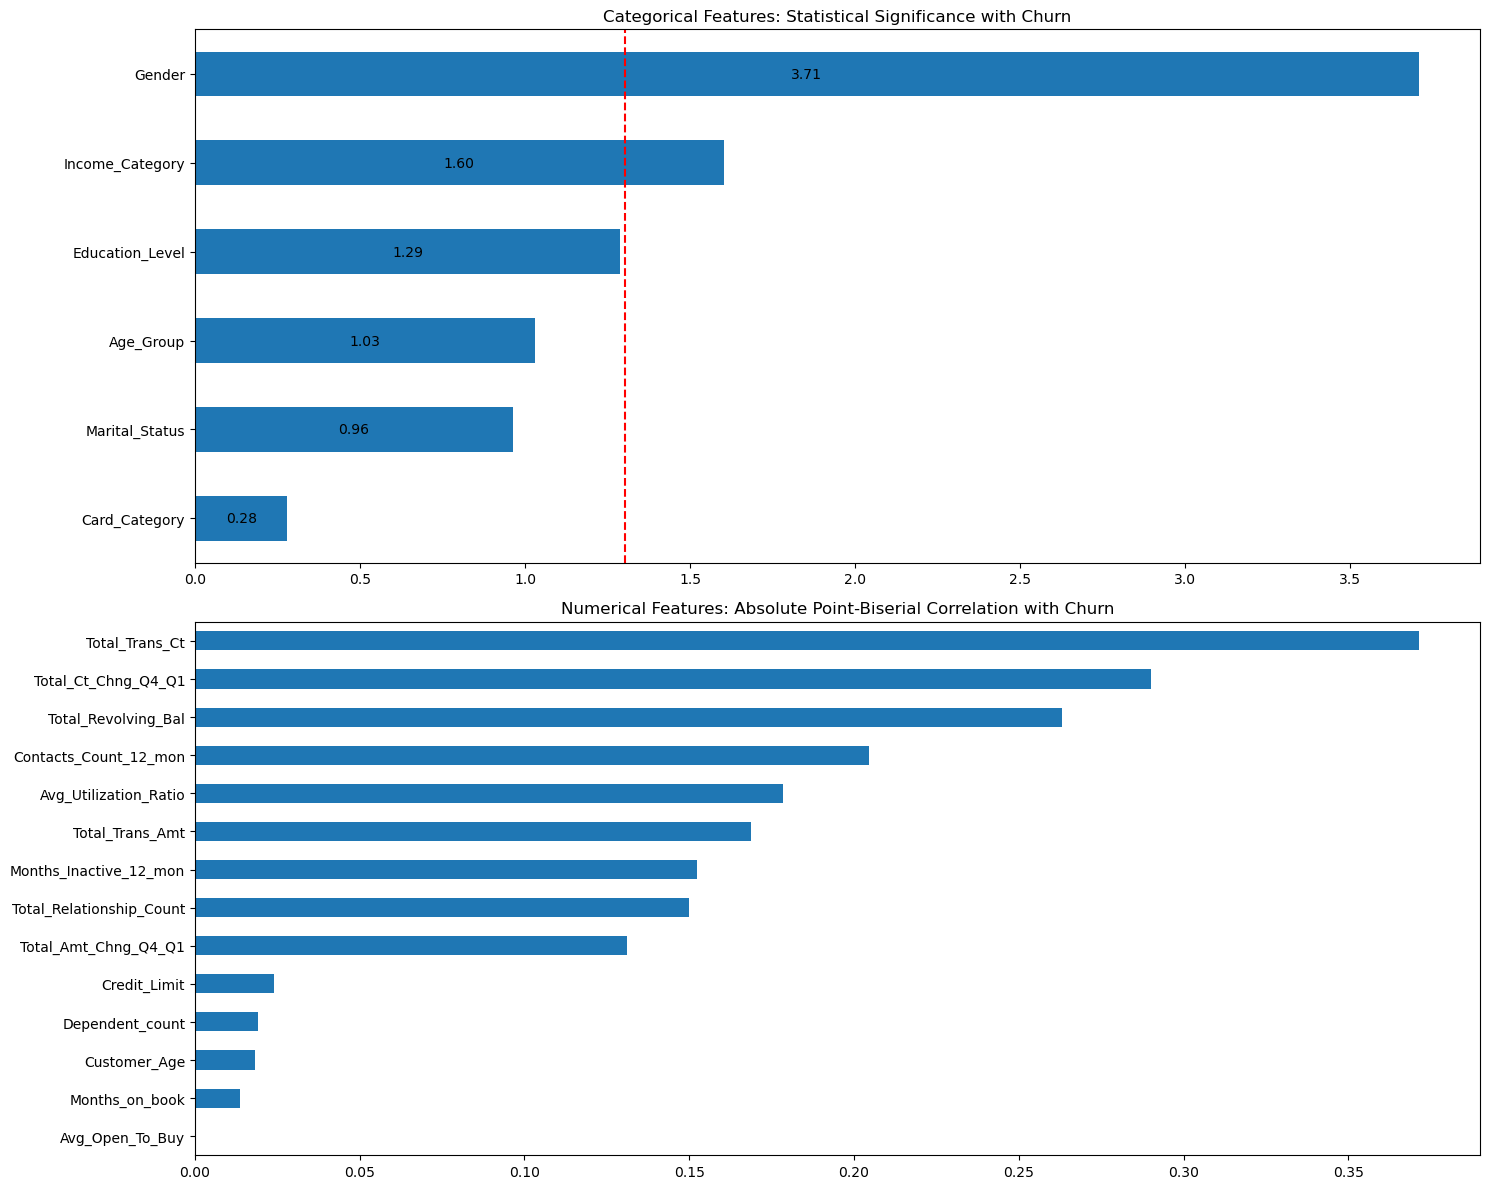

,point_biserial_corr
Total_Trans_Ct,-0.371
Total_Ct_Chng_Q4_Q1,-0.290
Total_Revolving_Bal,-0.263
Contacts_Count_12_mon,0.204
Avg_Utilization_Ratio,-0.178
Total_Trans_Amt,-0.169
Months_Inactive_12_mon,0.152
Total_Relationship_Count,-0.150
Total_Amt_Chng_Q4_Q1,-0.131
Credit_Limit,-0.024


In [ ]:

# Create age bins
df['Age_Group'] = pd.cut(df['Customer_Age'], 
                        bins=[26 ,36, 46, 56, 100],
                        labels=['26-35', '36-45', '46-55', '55+'])

# Separate features into categorical and numerical
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Age_Group',
                       'Income_Category', 'Card_Category',]
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                     'Total_Relationship_Count', 'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
                     'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 
                     'Avg_Utilization_Ratio']

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))


# 1. Categorical Features: Chi-square test
chi_square_results = {}
for cat_feature in categorical_features:
    contingency = pd.crosstab(df[cat_feature], df['Attrition_Flag'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    chi_square_results[cat_feature] = {'chi2': chi2, 'p_value': p_val}

# Plot chi-square statistics
cat_stats = pd.DataFrame(chi_square_results).T
cat_stats['-log10(p)'] = -np.log10(cat_stats['p_value'])
sorted_cat_stats = cat_stats['-log10(p)'].sort_values(ascending=True)

# Create horizontal bar plot for categorical features
sorted_cat_stats.plot(kind='barh', ax=ax1)
ax1.set_title('Categorical Features: Statistical Significance with Churn')
ax1.axvline(-np.log10(0.05), color='r', linestyle='--', label='p=0.05 threshold')

# Add value labels inside bars
for i, v in enumerate(sorted_cat_stats):
    ax1.text(v/2, i, f'{v:.2f}', ha='center', va='center')

# 2. Numerical Features: Point-Biserial Correlation with churn
churn_binary = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
pb_correlations = {}
for num_feature in numerical_features:
    corr, _ = pointbiserialr(churn_binary, df[num_feature])
    pb_correlations[num_feature] = corr

# Sort by absolute correlation and plot
abs_pb_corr = pd.Series(pb_correlations).abs().sort_values(ascending=True)
abs_pb_corr.plot(kind='barh', ax=ax2)
ax2.set_title('Numerical Features: Absolute Point-Biserial Correlation with Churn')



plt.tight_layout()
plt.show()

# Create styled tables
def style_negative(v):
    return 'color: red' if v < 0 else 'color: green'

# Categorical features table
cat_table = pd.DataFrame(chi_square_results).T
cat_table = cat_table.sort_values('chi2', ascending=False)
cat_table = cat_table.round(4)
# Display categorical features association table
cat_table

# Display numerical features point-biserial correlation table
num_table = pd.DataFrame(pb_correlations, index=['point_biserial_corr']).T
num_table = num_table.sort_values('point_biserial_corr', key=abs, ascending=False)
num_table = num_table.round(3)
num_table



In [10]:
cat_table

,chi2,p_value
Gender,13.8656,0.0002
Income_Category,12.8323,0.0250
Education_Level,12.5112,0.0515
Age_Group,6.4032,0.0936
Marital_Status,6.0561,0.1089
Card_Category,2.2342,0.5252


most influential features on churn are:
categorical features:

1. gender
2. income category
3. education level
------------------------------------------------
numerical features:

1. total transaction count
2. total ct change q4 q1
3. total revolving balance



# Demographic Risk Analysis

Analyzing churn patterns across key demographic variables:
- most influential:
1. gender
2. income category
3. education level
    - Age groups
    - Marital status 


For each demographic factor we'll:
1. the churners distribution (% of each category to the total churners)
2. Visualize the distributions
3. Perform statistical testing where appropriate
4. Identify high-risk segments (≥1.5x baseline churn)
5. Calculate churn rates by group

In [42]:
churned_df = df[df['Attrition_Flag'] == 'Attrited Customer']
churned_df.head()
total_churners = len(churned_df)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


# draft

In [50]:


pivot_edu = pd.pivot_table(
    churned_df,
    index='Education_Level',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})

group_totals = df.groupby('Education_Level')['CLIENTNUM'].count()
pivot_edu['total_in_group'] = group_totals
pivot_edu['churn_rate'] = (pivot_edu['churners'] / pivot_edu['total_in_group'] * 100).round(2)
pivot_edu['pct_of_total_churners'] = (pivot_edu['churners'] / total_churners * 100).round(2)

pivot_edu = pivot_edu.sort_values('churners', ascending=False)
pivot_edu
# ...existing code...

,churners,total_in_group,churn_rate,pct_of_total_churners
Education_Level,,,,
Graduate,487,3128,15.57,29.93
High School,306,2013,15.20,18.81
Unknown,256,1519,16.85,15.73
Uneducated,237,1487,15.94,14.57
College,154,1013,15.20,9.47
Doctorate,95,451,21.06,5.84
Post-Graduate,92,516,17.83,5.65


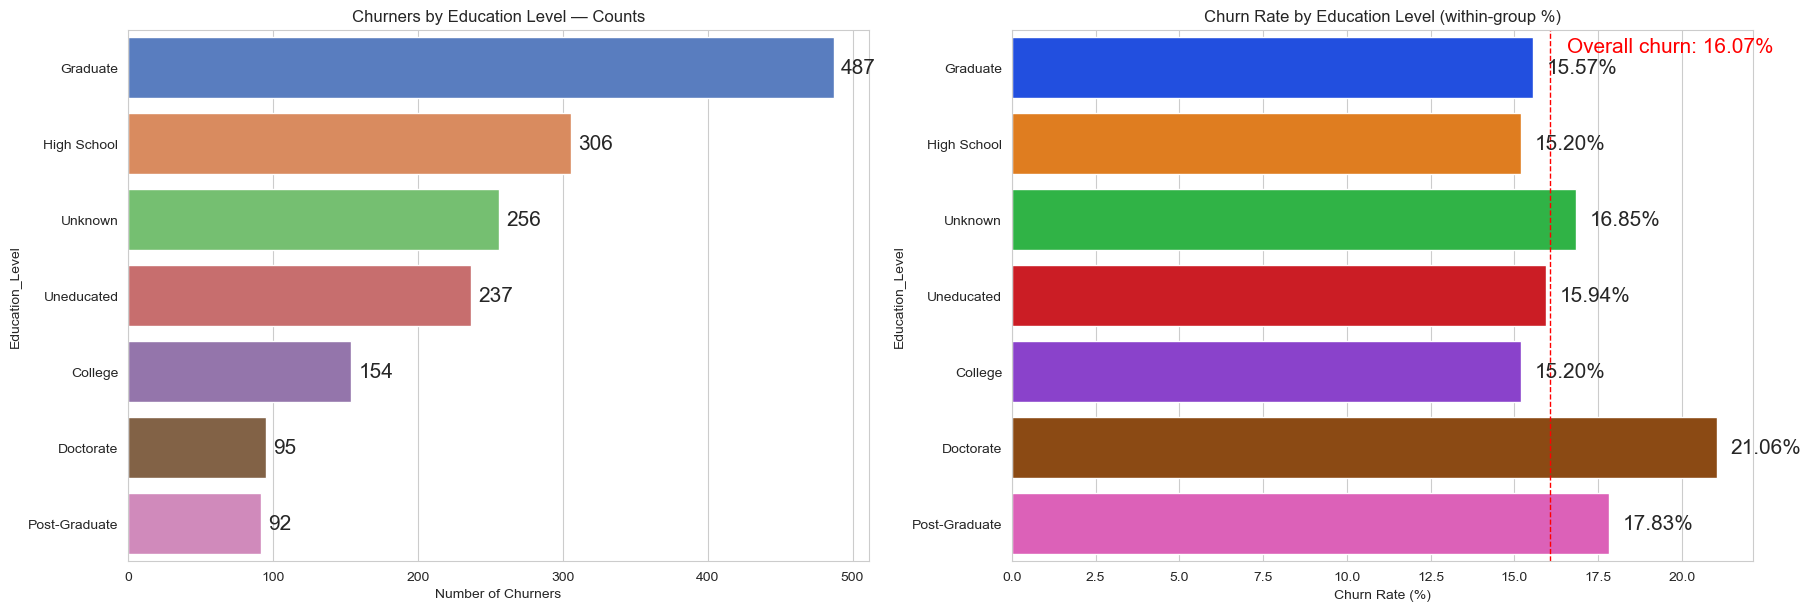

In [56]:
# ...existing code...
fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)
sns.set_style("whitegrid")
data_edu = pivot_edu.reset_index()

# Left: churners counts (horizontal)
ax = axes[0]
sns.barplot(x='churners', y='Education_Level', data=data_edu, palette='muted', ax=ax, orient='h')
ax.set_title("Churners by Education Level — Counts")
ax.set_xlabel("Number of Churners")
for i, row in data_edu.iterrows():
    ax.text(row['churners'] + max(data_edu['churners']) * 0.01, i, f"{int(row['churners']):,}", va='center', fontsize=15)

# Right: churn rate within group (horizontal)
ax = axes[1]
sns.barplot(x='churn_rate', y='Education_Level', data=data_edu, palette='bright', ax=ax, orient='h')
ax.set_title("Churn Rate by Education Level (within-group %)")
ax.set_xlabel("Churn Rate (%)")
baseline = len(churned_df) / len(df) * 100
ax.axvline(baseline, color='red', linestyle='--', linewidth=1)
ax.text(baseline + 0.5, -0.2, f"Overall churn: {baseline:.2f}%", color='red', fontsize=15)
for i, row in data_edu.iterrows():
    ax.text(row['churn_rate'] + 0.4, i, f"{row['churn_rate']:.2f}%", va='center', fontsize=15)

plt.show()
# ...existing code...

In [65]:
# ...existing code...
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by Education Level (count & share)", "Churn Rate by Education Level (within-group %)"))

fig.add_trace(
    go.Bar(
        x=pivot_edu.index,
        y=pivot_edu['churners'],
        text=pivot_edu['churners'].map("{:,}".format),
        customdata=pivot_edu[['pct_of_total_churners']].values,
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=pivot_edu.index,
        y=pivot_edu['churn_rate'],
        text=pivot_edu['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%"
    ),
    row=1, col=2
)

baseline = len(churned_df) / len(df) * 100
fig.add_hline(y=baseline, line=dict(color="red", dash="dash"), row=1, col=2)
fig.add_annotation(x=0.46, y=baseline, xref='x2 domain', yref='y2',
                   text=f"Overall churn: {baseline:.2f}%", showarrow=False, font=dict(color="red"), xanchor='right', yshift=18)

fig.update_layout(template="plotly_white", title_text="Education Level Churn Overview", width=850, height=500, showlegend=False)
fig.update_yaxes(title_text="Churners", row=1, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)
fig.show()
# ...existing code...

## income category churn analysis

In [43]:


pivot_income = pd.pivot_table(
    churned_df,
    index='Income_Category',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})

group_totals = df.groupby('Income_Category')['CLIENTNUM'].count()
pivot_income['total_in_group'] = group_totals
pivot_income['churn_rate'] = (pivot_income['churners'] / pivot_income['total_in_group'] * 100).round(2)
pivot_income['pct_of_total_churners'] = (pivot_income['churners'] / total_churners * 100).round(2)

pivot_income = pivot_income.sort_values('churners', ascending=False)
pivot_income

,churners,total_in_group,churn_rate,pct_of_total_churners
Income_Category,,,,
Less than $40K,612,3561,17.19,37.62
$40K - $60K,271,1790,15.14,16.66
$80K - $120K,242,1535,15.77,14.87
$60K - $80K,189,1402,13.48,11.62
Unknown,187,1112,16.82,11.49
$120K +,126,727,17.33,7.74


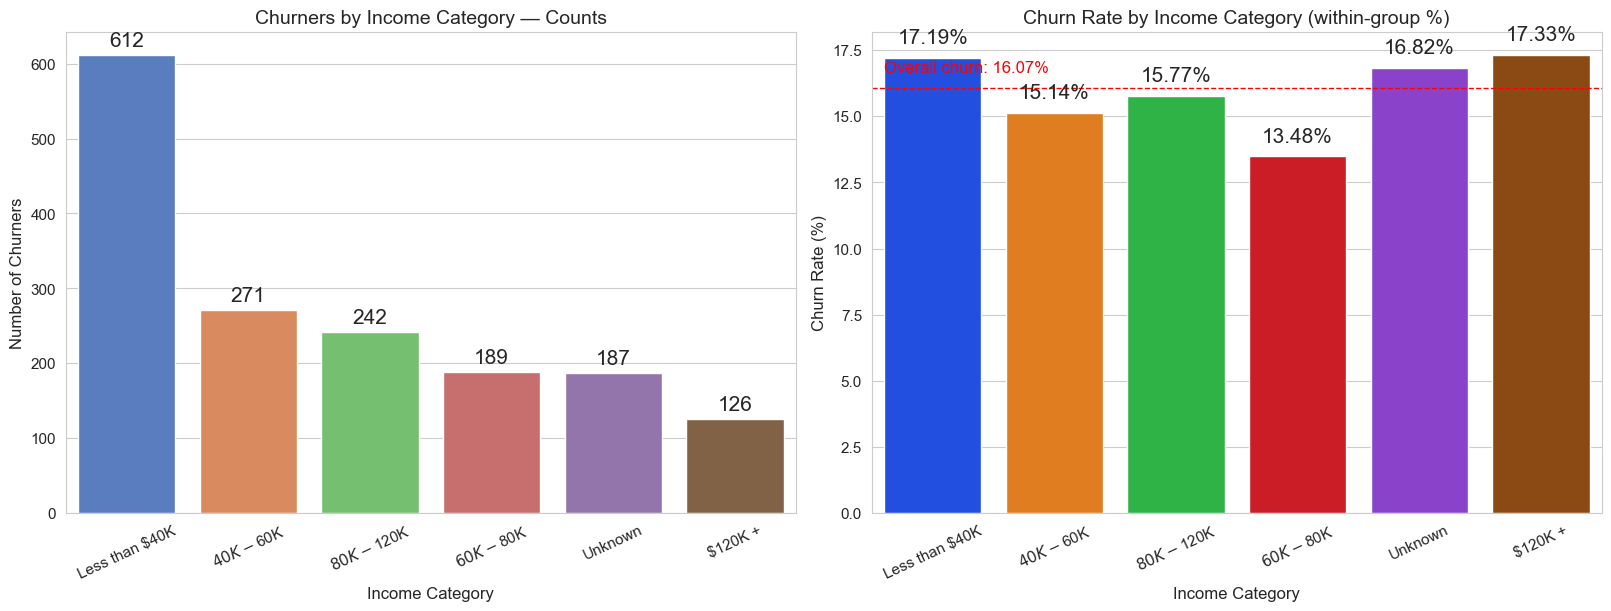

In [45]:

# ...existing code...
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)
sns.set_style("whitegrid")
data_inc = pivot_income.reset_index()

# Left: churners counts
ax = axes[0]
sns.barplot(x='Income_Category', y='churners', data=data_inc, palette='muted', ax=ax)
ax.set_title("Churners by Income Category — Counts", fontsize=14)
ax.set_xlabel("Income Category", fontsize=12)
ax.set_ylabel("Number of Churners", fontsize=12)
ax.tick_params(axis='x', rotation=25, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
for i, row in data_inc.iterrows():
    ax.text(i, row['churners'] + max(data_inc['churners']) * 0.01,
            f"{int(row['churners']):,}", ha='center', va='bottom', fontsize=15)

# Right: churn rate within group
ax = axes[1]
sns.barplot(x='Income_Category', y='churn_rate', data=data_inc, palette='bright', ax=ax)
ax.set_title("Churn Rate by Income Category (within-group %)", fontsize=14)
ax.set_ylabel("Churn Rate (%)", fontsize=12)
ax.set_xlabel("Income Category", fontsize=12)
ax.tick_params(axis='x', rotation=25, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
baseline = len(churned_df) / len(df) * 100
ax.axhline(baseline, color='red', linestyle='--', linewidth=1)
ax.text(-0.4, baseline + 0.6, f"Overall churn: {baseline:.2f}%", color='red', fontsize=12)
for i, row in data_inc.iterrows():
    ax.text(i, row['churn_rate'] + 0.4, f"{row['churn_rate']:.2f}%", ha='center', va='bottom', fontsize=15)

plt.show()
# ...existing code...

In [49]:


fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by Income Category (count & share)",
                                    "Churn Rate by Income Category (within-group %)"))

# left: counts with pct_of_total_churners
fig.add_trace(
    go.Bar(
        x=pivot_income.index,
        y=pivot_income['churners'],
        text=pivot_income['churners'].map("{:,}".format),
        customdata=pivot_income[['pct_of_total_churners']].values,
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%"
    ),
    row=1, col=1
)

# right: churn rate (percent)
fig.add_trace(
    go.Bar(
        x=pivot_income.index,
        y=pivot_income['churn_rate'],
        #text=pivot_income['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%"
    ),
    row=1, col=2
)

baseline = len(churned_df) / len(df) * 100
fig.add_hline(y=baseline, line=dict(color="blue", dash="dash"), row=1, col=2)
fig.add_annotation(x=0.46, y=baseline, xref='x2 domain', yref='y2',
                   text=f"Overall churn: {baseline:.2f}%", showarrow=False,
                   font=dict(color="blue", size=12), xanchor='right', yshift=-12)

fig.update_layout(template="plotly_white",
                  title_text="Income Category Churn Overview",
                  title_font=dict(size=16),
                  width=850, height=450, showlegend=False)

fig.update_xaxes(tickfont=dict(size=11))
fig.update_yaxes(title_text="Churners", row=1, col=1, title_font=dict(size=12), tickfont=dict(size=11))
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2, title_font=dict(size=12), tickfont=dict(size=11))

fig.show()
# ...existing code...

## gender-level churn analysis

In [25]:
# Pivot table: Gender as rows, number of churners and percentage of total churners as values
pivot_gender = pd.pivot_table(
    df[df['Attrition_Flag'] == 'Attrited Customer'],
    index='Gender',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})
# add total per gender and churn rate (percentage of that gender who churned)
group_totals = df.groupby('Gender')['CLIENTNUM'].count()
pivot_gender['total_in_group'] = group_totals
pivot_gender['churn_rate'] = (pivot_gender['churners'] / pivot_gender['total_in_group'] * 100).round(2)

pivot_gender['pct_of_total_churners'] = (pivot_gender['churners'] / total_churners * 100).round(2)

# Sort for readability
pivot_gender = pivot_gender.sort_values('churners', ascending=False)


pivot_gender

,churners,total_in_group,churn_rate,pct_of_total_churners
Gender,,,,
F,930,5358,17.36,57.16
M,697,4769,14.62,42.84


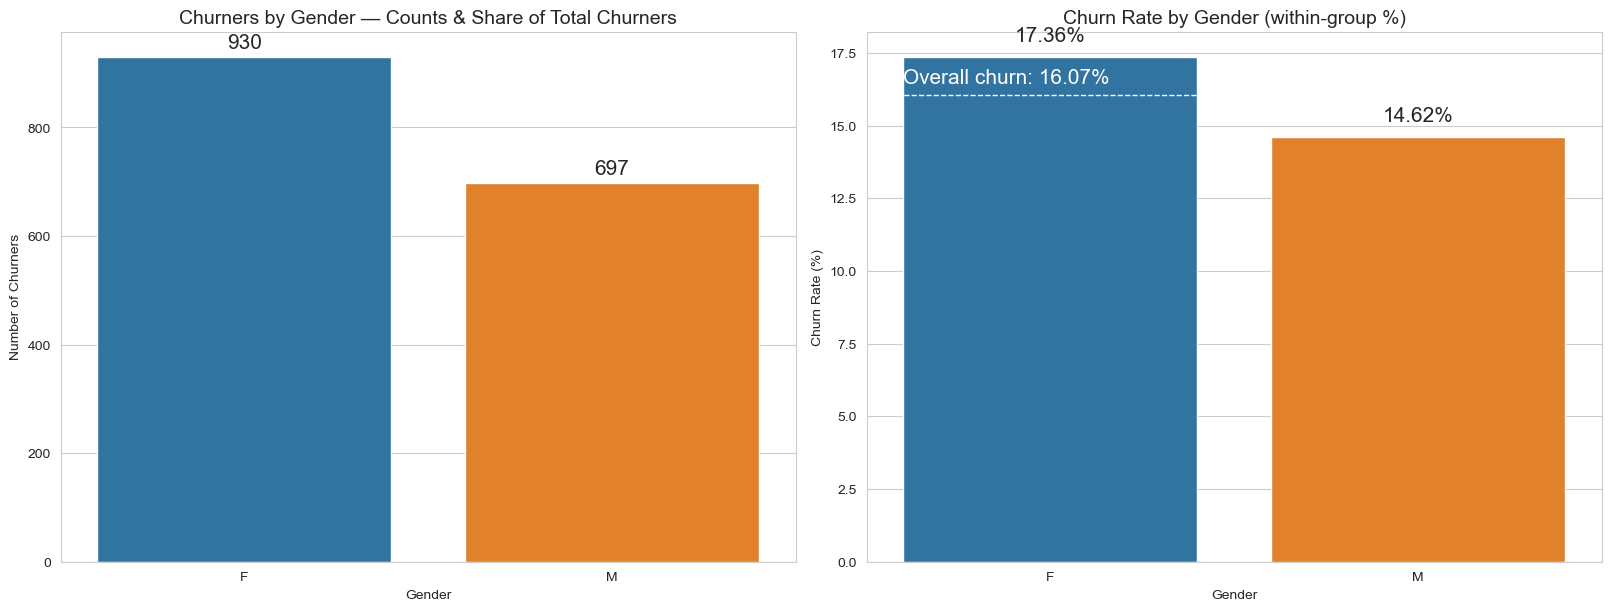

In [35]:
# Seaborn + Matplotlib figure (put this in a new cell)
# Uses existing `pivot_gender` DataFrame
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, constrained_layout=True)
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Left: churners (absolute counts)
ax = axes[0]
data = pivot_gender.reset_index()
sns.barplot(x='Gender', y='churners', data=data, palette=palette, ax=ax)
for i, row in data.iterrows():
    ax.text(i, row['churners'] + max(data['churners']) * 0.01,
            f"{row['churners']:,}",
            ha='center', va='bottom', fontsize=15)
ax.set_title("Churners by Gender — Counts & Share of Total Churners", fontsize=14)
ax.set_ylabel("Number of Churners")
ax.set_xlabel("Gender")

# Right: churn rate (percentage within group)
ax = axes[1]
sns.barplot(x='Gender', y='churn_rate', data=data, palette=palette, ax=ax)
for i, row in data.iterrows():
    ax.text(i, row['churn_rate'] + 0.4,
            f"{row['churn_rate']:.2f}%",
            ha='center', va='bottom', fontsize=15)
# baseline churn line
baseline = (df['Attrition_Flag'] == 'Attrited Customer').mean() * 100
ax.axhline(baseline, color='white', linestyle='--', linewidth=1)
ax.text(-0.4, baseline + 0.4, f"Overall churn: {baseline:.2f}%", color='white', fontsize=15)
ax.set_title("Churn Rate by Gender (within-group %)", fontsize=14)
ax.set_ylabel("Churn Rate (%)")
ax.set_xlabel("Gender")

#plt.suptitle("Gender-Level Churn: Counts vs Within-Group Rate", fontsize=16, y=1.02)
plt.show()



In [41]:

# Plotly interactive figure (put this in the next new cell)
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by Gender (count & share)", "Churn Rate by Gender (within-group %)"))

# left: churners count with secondary text showing pct_of_total_churners
fig.add_trace(
    go.Bar(
        x=pivot_gender.index,
        y=pivot_gender['churners'],
        text=pivot_gender['churners'].map("{:,}".format),
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%",
        customdata=pivot_gender[['pct_of_total_churners']].values,
        marker_color=['#4C78A8', '#F58518']
    ),
    row=1, col=1
)

# right: churn rate
fig.add_trace(
    go.Bar(
        x=pivot_gender.index,
        y=pivot_gender['churn_rate'],
        text=pivot_gender['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%",
        marker_color=['#54A24B', '#E45756']
    ),
    row=1, col=2
)

# add overall baseline churn as a horizontal line in the second subplot
fig.add_hline(y=baseline, line=dict(color="red", dash="dash"), row=1, col=2)
fig.add_annotation(
    x=0.46, y=baseline,
    xref='x2 domain', yref='y2',
    text=f"Overall churn: {baseline:.2f}%",
    showarrow=False,
    font=dict(color="red"),
    xanchor='right',
    yshift=-12  # move annotation slightly down (pixels)
)

fig.update_layout(
    template="plotly_white",
    title_text="Gender Churn Overview — Counts & Within-Group Rates",
    width=850,
    height=450,
    showlegend=False
)
fig.update_yaxes(title_text="Churners", row=1, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)

fig.show()

In [ ]:
# Count churners by age group
churners_by_age = df.groupby('Age_Group')['Attrition_Flag'].apply(
    lambda x: (x=='Attrited Customer').mean()
).round(3)
print("Churner counts by age group:")
churners_by_age

Churner counts by age group:


Age_Group
26-35    0.132
36-45    0.166
46-55    0.166
55+      0.157
Name: Attrition_Flag, dtype: float64

- 17%  of (36-45 & 46-55) age groups churn


Sample Sizes by Age Group:
--------------------------------------------------
26-35: n=1,062 (10.5%)
36-45: n=4,011 (39.6%)
46-55: n=3,907 (38.6%)
55+: n=1,069 (10.6%)

Statistical Test Results:
--------------------------------------------------
Chi-square statistic: 8.16
p-value: 0.0429


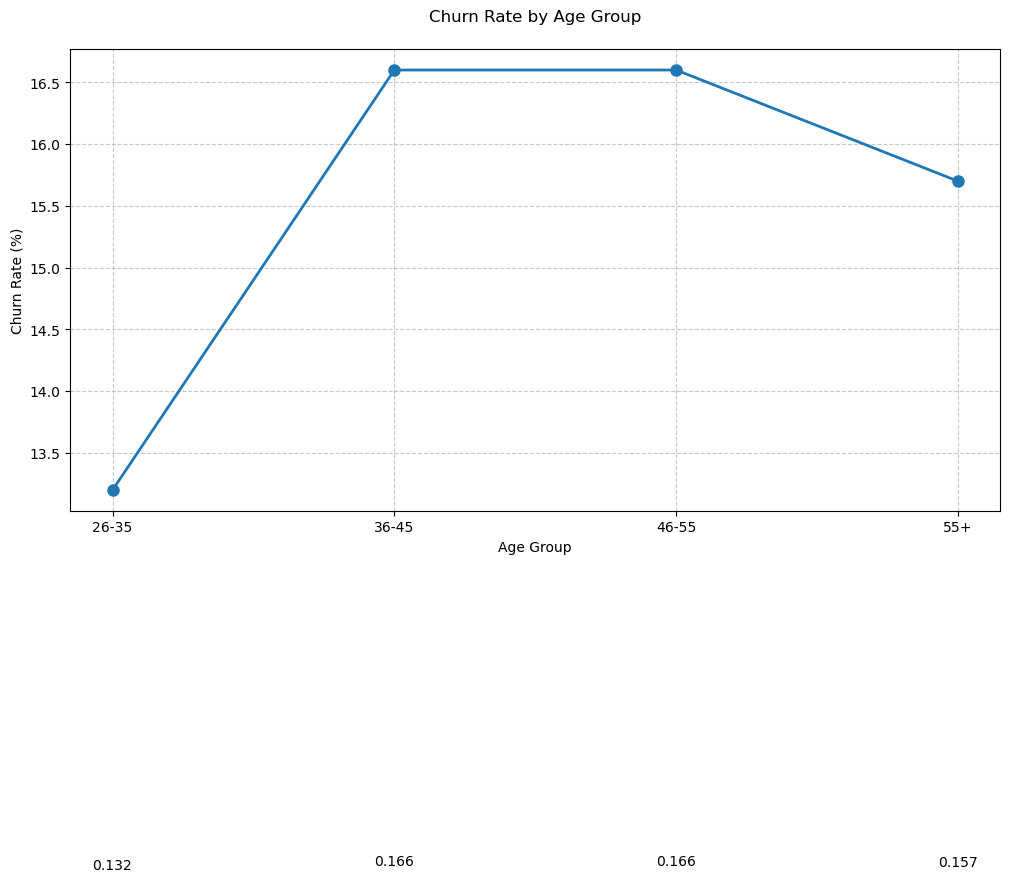

In [23]:




# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot line chart
ax.plot(churners_by_age.index, churners_by_age.values*100, 
    marker='o', linewidth=2, markersize=8)

# Add value labels
for x, y in zip(range(len(churners_by_age)), churners_by_age.values):
    ax.text(x, y + 10, f'{y}', ha='center')

# Customize plot
ax.set_title('Churn Rate by Age Group', pad=20)
ax.set_ylabel('Churn Rate (%)')
ax.set_xlabel('Age Group')
ax.grid(True, linestyle='--', alpha=0.7)

# Add sample sizes
sizes = df['Age_Group'].value_counts().sort_index()

print("\nSample Sizes by Age Group:")
print("-" * 50)
for group, size in sizes.items():
    print(f"{group}: n={size:,} ({size/len(df)*100:.1f}%)")


# Print statistical test results


contingency = pd.crosstab(df['Age_Group'], df['Attrition_Flag'])
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("\nStatistical Test Results:")
print("-" * 50)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# Identify high-risk age groups (>1.5x baseline churn)
baseline_churn = (df['Attrition_Flag']=='Attrited Customer').mean()
high_risk = churners_by_age[churners_by_age > (baseline_churn * 1.5)]

if len(high_risk) > 0:
    print("\nHigh Risk Age Groups (>1.5x baseline):")
    print("-" * 50)
    for age, rate in high_risk.items():
        print(f"{age}: {rate*100:.1f}% churn rate ({rate/baseline_churn:.1f}x baseline)")